In [2]:
from pyspark.sql import SQLContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
import pandas as pd
%matplotlib inline

In [9]:
dataPd2 = pd.read_csv('~/Downloads/big_data_capstone_datasets_and_scripts/combined-data.csv')

In [10]:
dataPd2.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
0,812,5648,1,android,69,8,NaN,NaN
1,1658,5649,1,iphone,31,5,NaN,NaN
2,1589,5650,1,iphone,26,2,NaN,NaN
3,1863,5651,1,android,35,4,NaN,NaN
4,937,5652,1,android,39,0,1.0,1.0


In [11]:
dataPd2.loc[dataPd2.avg_price.isnull(),'avg_price']=0
dataPd2.loc[dataPd2.count_buyId.isnull(),'count_buyId']=0

#dataPd2.head()
dataPd2.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
0,812,5648,1,android,69,8,0.0,0.0
1,1658,5649,1,iphone,31,5,0.0,0.0
2,1589,5650,1,iphone,26,2,0.0,0.0
3,1863,5651,1,android,35,4,0.0,0.0
4,937,5652,1,android,39,0,1.0,1.0


In [12]:
dataPd2['revenue']=dataPd2['avg_price']*dataPd2['count_buyId']
dataPd2['isHitRate']=dataPd2['count_hits']/dataPd2['count_gameclicks']

In [13]:
dataPd2.head(17)

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,revenue,isHitRate
0,812,5648,1,android,69,8,0.0,0.0,0.0,0.115942
1,1658,5649,1,iphone,31,5,0.0,0.0,0.0,0.161290
2,1589,5650,1,iphone,26,2,0.0,0.0,0.0,0.076923
3,1863,5651,1,android,35,4,0.0,0.0,0.0,0.114286
4,937,5652,1,android,39,0,1.0,1.0,1.0,0.000000
5,342,5653,1,android,36,5,0.0,0.0,0.0,0.138889
6,849,5654,1,iphone,40,5,0.0,0.0,0.0,0.125000
7,1277,5655,1,windows,46,8,0.0,0.0,0.0,0.173913
8,2203,5656,1,android,68,6,0.0,0.0,0.0,0.088235
9,585,5657,1,iphone,76,9,0.0,0.0,0.0,0.118421


In [14]:
dataPd2.count()
dataPd2.dtypes

userId                int64
userSessionId         int64
teamLevel             int64
platformType         object
count_gameclicks      int64
count_hits            int64
count_buyId         float64
avg_price           float64
revenue             float64
isHitRate           float64
dtype: object

In [16]:
sqlContext = SQLContext(sc)
data2 = pDF = sqlContext.createDataFrame(dataPd2)

In [17]:
data2.take(3)

[Row(userId=812, userSessionId=5648, teamLevel=1, platformType='android', count_gameclicks=69, count_hits=8, count_buyId=0.0, avg_price=0.0, revenue=0.0, isHitRate=0.11594202898550725),
 Row(userId=1658, userSessionId=5649, teamLevel=1, platformType='iphone', count_gameclicks=31, count_hits=5, count_buyId=0.0, avg_price=0.0, revenue=0.0, isHitRate=0.16129032258064516),
 Row(userId=1589, userSessionId=5650, teamLevel=1, platformType='iphone', count_gameclicks=26, count_hits=2, count_buyId=0.0, avg_price=0.0, revenue=0.0, isHitRate=0.07692307692307693)]

In [18]:
data2.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
userId,4619,1189.9647109764019,691.0986309664246,0,2389
userSessionId,4619,17963.06798008227,7947.681126803095,5648,38722
teamLevel,4619,4.355704697986577,1.9246625516949587,1,8
count_gameclicks,4619,143.06300064949124,126.88339694316925,1,1207
count_hits,4619,15.705780471963628,13.986901900918744,0,121
count_buyId,4619,0.5141805585624594,0.9213108016318844,0.0,6.0
avg_price,4619,2.2038125135310676,4.90815363459935,0.0,20.0
revenue,4619,3.6781078155444917,9.003419458464911,0.0,100.0
isHitRate,4619,0.11126106781475024,0.04031406730713057,0.0,1.0


In [19]:
featuresUsed = ["teamLevel", "count_gameclicks","isHitRate","revenue"]
assembler = VectorAssembler(inputCols = featuresUsed, outputCol = "unscaled_features")
assembled = assembler.transform(data2)

In [20]:
scaler = StandardScaler(inputCol = "unscaled_features", outputCol = "features", withStd = True, withMean = True)
scalerModel = scaler.fit(assembled)
scaledData = scalerModel.transform(assembled)

In [21]:
scaledData = scaledData.select("features")
scaledData.persist()

DataFrame[features: vector]

In [22]:
kmeans = KMeans(k=4,seed=1)
model = kmeans.fit(scaledData)
transformed = model.transform(scaledData)

In [23]:
centers = model.clusterCenters()
centers

[array([ 0.86570069, -0.21293302, -0.0127394 , -0.24507387]),
 array([-0.89329449, -0.38178499, -0.04340404, -0.30765913]),
 array([-0.49676996,  2.31216637, -0.10723995, -0.23463913]),
 array([ 0.44591589, -0.08180982,  0.37195592,  2.73402992])]

In [24]:
import utils
clusters = range(2,7)
wsseList = utils.elbow(scaledData,clusters)

Training for cluster size 2 
......................WSSE = 7198.054004833578 
Training for cluster size 3 
......................WSSE = 6516.054141496852 
Training for cluster size 4 
......................WSSE = 5434.622544842008 
Training for cluster size 5 
......................WSSE = 5421.36724599727 
Training for cluster size 6 
......................WSSE = 4790.1754704267105 


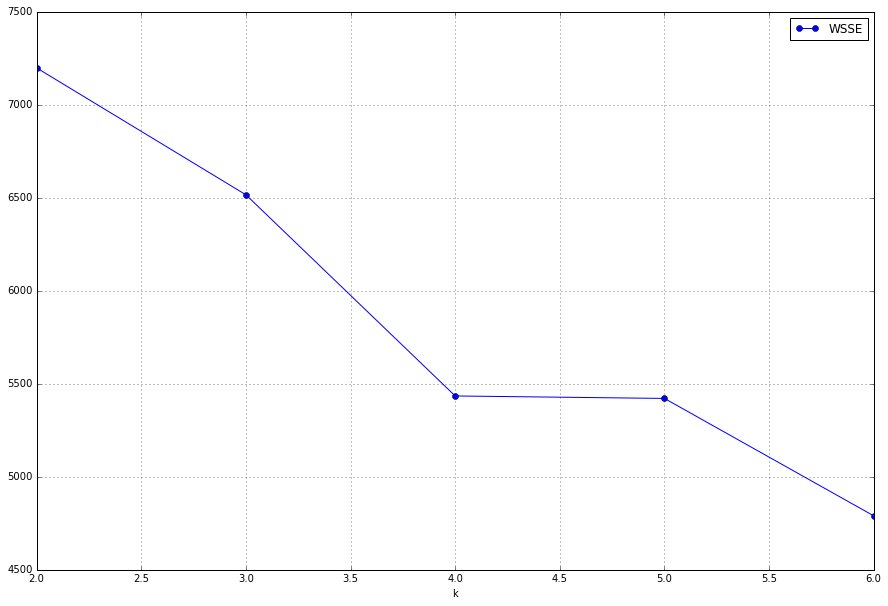

In [25]:
utils.elbow_plot(wsseList,clusters)

In [28]:
dataPd2_filtered = dataPd2.loc[dataPd2["avg_price"] >0]
dataPd2_filtered.shape

(1411, 10)

In [27]:
data2_filtered = sqlContext.createDataFrame(dataPd2_filtered)

In [29]:
featuresUsed = ["teamLevel", "count_gameclicks","isHitRate","revenue"]
assembler = VectorAssembler(inputCols = featuresUsed, outputCol = "unscaled_features")
assembled = assembler.transform(data2_filtered)

In [30]:
scaler = StandardScaler(inputCol = "unscaled_features", outputCol = "features", withStd = True, withMean = True)
scalerModel = scaler.fit(assembled)
scaledData = scalerModel.transform(assembled)

In [31]:
scaledData = scaledData.select("features")
scaledData.persist()

DataFrame[features: vector]

In [36]:
wsseList = utils.elbow(scaledData,clusters)

Training for cluster size 2 
......................WSSE = 2266.251988081977 
Training for cluster size 3 
......................WSSE = 2014.8046482729096 
Training for cluster size 4 
......................WSSE = 1817.2829109335316 
Training for cluster size 5 
......................WSSE = 1680.4156589473298 
Training for cluster size 6 
......................WSSE = 1597.1585709517526 


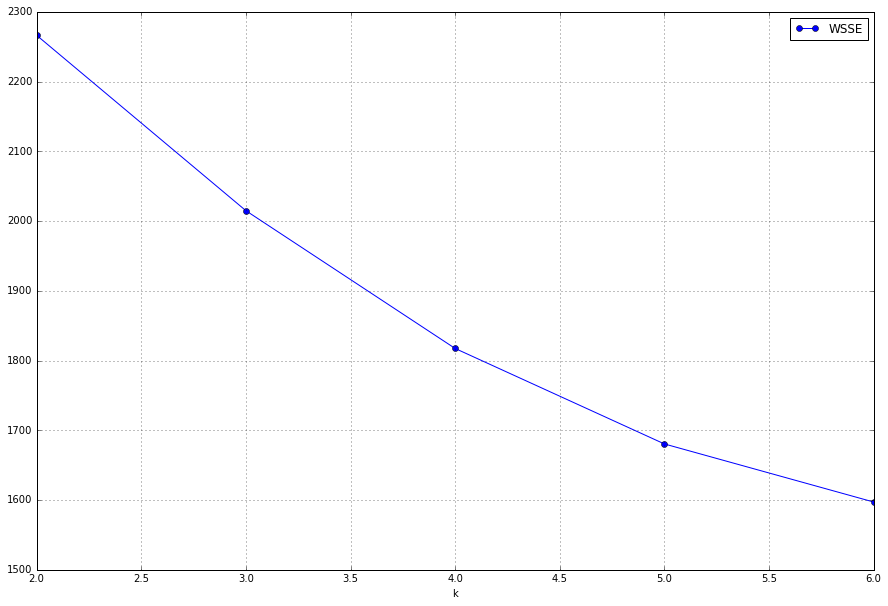

In [37]:
utils.elbow_plot(wsseList,clusters)

In [38]:
kmeans = KMeans(k=3,seed=1)
model = kmeans.fit(scaledData)
transformed = model.transform(scaledData)

In [39]:
centers = model.clusterCenters()
centers

[array([-1.10989195,  0.32100267, -0.32716861, -0.35485488]),
 array([ 0.61632754, -0.22336137,  0.08423079, -0.4691564 ]),
 array([ 0.41282224, -0.02802521,  0.31908294,  1.4814874 ])]

In [347]:
assembled.toPandas().shape

(1411, 11)

In [356]:
data2_filtered[featuresUsed].toPandas().head(8)

,teamLevel,count_gameclicks,isHitRate,revenue
0,1,39,0.000000,1.0
1,1,129,0.069767,10.0
2,1,102,0.137255,5.0
3,1,39,0.102564,3.0
4,1,90,0.111111,3.0
5,1,51,0.156863,20.0
6,1,51,0.117647,5.0
7,1,47,0.106383,4.0


In [360]:
data2_filtered[featuresUsed].toPandas().shape

(1411, 4)

In [41]:
!echo '*.gz\n*.zip\nX'>X; tar cvfzh week3_assignment_final.tar.gz -X X ./*

./ad-clicks.csv
./buy-clicks.csv
./chat-data.zip
./combined-data.csv
./combined-data.zip
./flamingo-data.zip
./game-clicks.csv
./level-events.csv
./load-neo4j.cypher
./__pycache__/
./__pycache__/utils.cpython-35.pyc
./setupWeek3.sh
./sparkMLlibClustering.py
./team-assignments.csv
./team.csv
./users.csv
./user-session.csv
./utils.py
./Week 3 Assignment K Means-final.ipynb
./Week 3 Assignment K Means.ipynb
./Week 3 pySpark MLlib Clustering.ipynb
./X
